# Отчет по лабораторной работе 1.3

## Эффект Рамзауэра - рассеяние медленных электронов на атомах
Конкс Эрик, Б01-818

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d
from scipy import odr

In [2]:
Vnak =  [2.5, 2.53, 2.7, 2.840, 2.9]
Vmax = [0.25, 0.25, 0.25, -1, -0.75]
Vmax_err = [0.25, 0.25, 0.25, 0.25, 0.25]
Vmin = [-10.25, -10.75, -10.75, -11, -10.75]
Vmin_err = [0.75, 0.75, 0.75, 1, 0.75]
div = 2 / 5
V0 = 4
U = 2.5
h = 6.626 * 10**-34
m = 9.11 * 10**-31
e = 1.6 * 10**-19

In [3]:
lmax = [h/2/np.sqrt(2*m*e*((V0 - Vmax_i)*div+U)) for Vmax_i in Vmax]
lmax_err = [h*8*m*e*div*Vmax_err[i]/2/np.sqrt(2*m*e*((V0 - Vmax[i])*div+U))**3 for i in range(len(Vnak))]
lmin = [3*h/4/np.sqrt(2*m*e*((V0 - Vmin_i)*div+U)) for Vmin_i in Vmin]
lmin_err = [h*8*m*e*div*Vmin_err[i]/2/np.sqrt(2*m*e*((V0 - Vmin[i])*div+U))**3 for i in range(len(Vnak))]
l = [h*np.sqrt(5)/np.sqrt(32*m*e*(-Vmin[i]+Vmax[i])*div) for i in range(len(Vnak))]
l_err1 = [h*32*m*e*np.sqrt(5)*div*Vmin_err[i]/np.sqrt(32*m*e*(-Vmin[i]+Vmax[i])*div)**3 for i in range(len(Vnak))]
l_err2 = [h*32*m*e*np.sqrt(5)*div*Vmax_err[i]/np.sqrt(32*m*e*(-Vmin[i]+Vmax[i])*div)**3 for i in range(len(Vnak))]
l_err = [np.sqrt(l_err1[i]**2 + l_err2[i]**2) for i in range(len(Vnak))]
U0 = [4/5*(V0 - Vmin[i])*div - 9/5*(V0 - Vmax[i])*div for i in range(len(Vnak))]
U0_err = [np.sqrt((4/5*div*Vmin_err[i])**2 + (9/5*div*Vmax_err[i])**2) for i in range(len(Vnak))]

In [4]:
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [18, 14]

In [5]:
Vk1 = [0.375, 0.54, 0.74, 0.94, 1.117, 1.23, 1.37, 1.45, 1.553, 1.695, 1.905, 2.058, 2.250, 2.540,
       3.048, 3.217, 3.426, 4.168, 5.069, 5.287, 5.810, 6.012, 6.671, 7.390, 8.052, 9.018, 10.902, 11.978]
Va1 = [2.12, 8.28, 23.45, 54.4, 71.85, 90.87, 111.15, 119.3, 129.66, 138.51, 140.10, 135.90, 126.0, 108.9,
       81.27, 74.26, 68.1, 52.5, 43.0, 42.1, 40.67, 40.7, 41.29, 42.9, 45.5, 52.3, 78.8, 109.0]
R = 100
Ia1 = [Va / R for Va in Va1]
Vk2 = [0.591, 0.882, 1.2, 1.342, 1.679, 1.751, 1.550, 1.853, 2.07, 2.38, 2.77, 3.025,
       3.683, 4.21, 4.549, 4.964, 5.445, 5.665, 5.80, 6.243, 6.615, 6.937, 7.316, 7.883,
       8.127, 8.734, 9.887, 10.26, 11.205, 12.047]
Va2 = [3.42, 20.19, 50.79, 76.49, 92.75, 90.20, 90.2, 85.78, 71.62, 53.50, 36.92, 30.69,
      21.88, 18.30, 16.89, 15.5, 14.8, 14.68, 14.57, 14.41, 14.40, 14.73, 15.03, 15.55,
      15.85, 17.02, 22.36, 23.27, 29.05, 35.12]
Ia2 = [Va / R for Va in Va2]
Vmin1 = 5.95
Vmin1_err = 0.4
Vmax1 = 1.84
Vmax1_err = 0.2
Vmin2 = 6.2
Vmin2_err = 0.4
Vmax2 = 1.66
Vmax2_err = 0.2
xlin1 = np.linspace(Vk1[0], Vk1[-1], num=1000, endpoint=True)
ylin1 = interp1d(Vk1, Ia1, kind='cubic')(xlin1)
xlin2 = np.linspace(Vk2[0], Vk2[-1], num=1000, endpoint=True)
ylin2 = interp1d(Vk2, Ia2, kind='cubic')(xlin2)

lmax_st1 = h/2/np.sqrt(2*m*e*(Vmax1+U))
lmax_st1_err = h*8*m*e*Vmax1_err/2/np.sqrt(2*m*e*(Vmax1+U))**3
lmin_st1 = 3*h/4/np.sqrt(2*m*e*(Vmin1+U))
lmin_st1_err = h*8*m*e*Vmin1_err/2/np.sqrt(2*m*e*(Vmin1+U))**3
l_st1 = h*np.sqrt(5)/np.sqrt(32*m*e*(Vmin1-Vmax1))
l_st1_err1 = h*32*m*e*np.sqrt(5)*Vmin1_err/np.sqrt(32*m*e*(Vmin1-Vmax1))**3
l_st1_err2 = h*32*m*e*np.sqrt(5)*Vmax1_err/np.sqrt(32*m*e*(Vmin1-Vmax1))**3
l_st1_err = np.sqrt(l_st1_err1**2 + l_st1_err2**2)
U0_st1 = 4/5*Vmin1 - 9/5*Vmax1
U0_st1_err = np.sqrt((4/5*Vmin1_err)**2 + (9/5*Vmax1_err)**2)
          
lmax_st2 = h/2/np.sqrt(2*m*e*(Vmax2+U))
lmax_st2_err = h*8*m*e*Vmax2_err/2/np.sqrt(2*m*e*(Vmax2+U))**3
lmin_st2 = 3*h/4/np.sqrt(2*m*e*(Vmin2+U))
lmin_st2_err = h*8*m*e*Vmin2_err/2/np.sqrt(2*m*e*(Vmin2+U))**3
l_st2 = h*np.sqrt(5)/np.sqrt(32*m*e*(Vmin2-Vmax2))
l_st2_err1 = h*32*m*e*np.sqrt(5)*Vmin2_err/np.sqrt(32*m*e*(Vmin2-Vmax2))**3
l_st2_err2 = h*32*m*e*np.sqrt(5)*Vmax2_err/np.sqrt(32*m*e*(Vmin2-Vmax2))**3
l_st2_err = np.sqrt(l_st2_err1**2 + l_st2_err2**2)
U0_st2 = 4/5*Vmin2 - 9/5*Vmax2
U0_st2_err = np.sqrt((4/5*Vmin2_err)**2 + (9/5*Vmax2_err)**2)

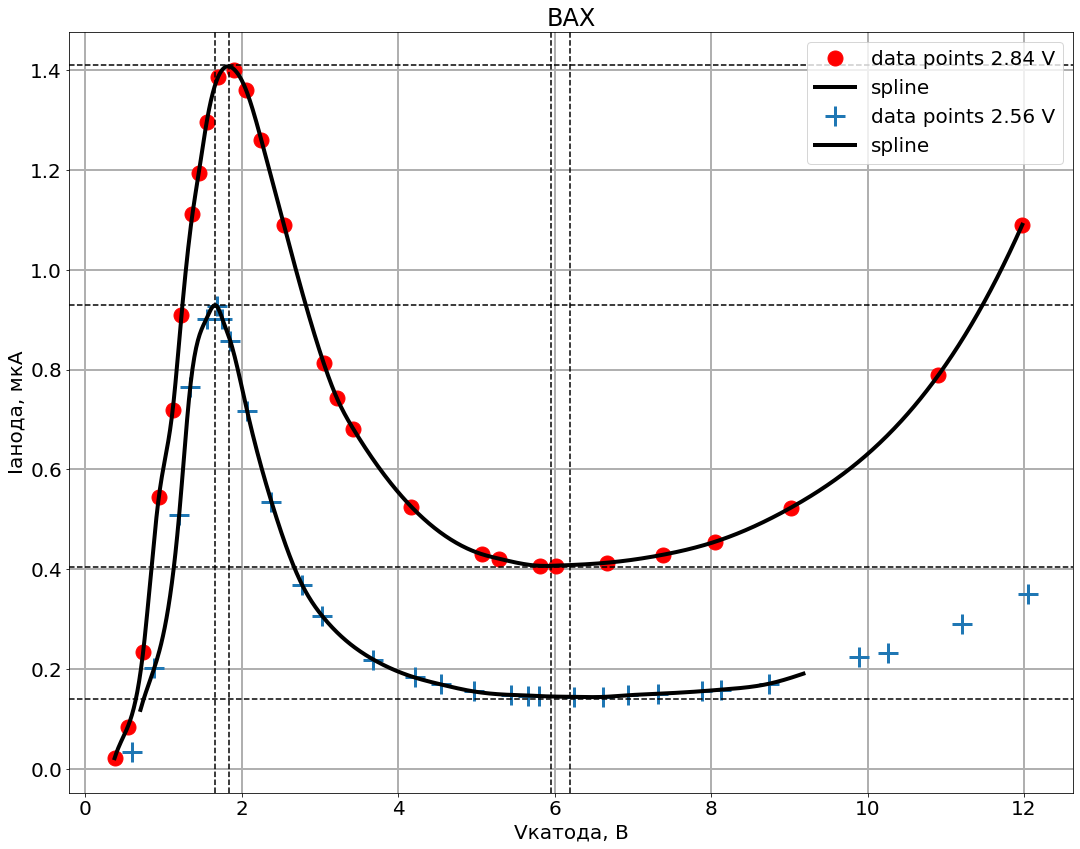

In [6]:
plot = plt.figure(num='ВАХ')
plt.plot(Vk1, Ia1, 'ro', label='data points 2.84 V', markersize=15)
plt.plot(xlin1, ylin1, color='black', linewidth=4, label='spline')
plt.plot(Vk2, Ia2, '+', label='data points 2.56 V', markersize=20, mew=3)
plt.plot(xlin2[10:750], ylin2[10:750], color='black', linewidth=4, label='spline')
plt.axhline(y=0.405, color="black", linestyle="--")
plt.axvline(x=Vmin1, color="black", linestyle="--")
plt.axhline(y=1.41, color="black", linestyle="--")
plt.axvline(x=Vmax1, color="black", linestyle="--")
plt.axhline(y=0.14, color="black", linestyle="--")
plt.axvline(x=Vmin2, color="black", linestyle="--")
plt.axhline(y=0.93, color="black", linestyle="--")
plt.axvline(x=Vmax2, color="black", linestyle="--")
plt.ylabel('Iанода, мкА')
plt.xlabel('Vкатода, В')
plt.grid(linewidth=2)
plt.legend()
plt.title('ВАХ')
plt.show()

In [7]:
def get_display_string(value, err):
    return '{:.2f} +- {:.2f}'.format(value*10**10, err*10**10)

In [8]:
Vmax_dyn1 = get_display_string((V0 - Vmax[0])*div/10**10, Vmax_err[0]*div/10**10)
Vmin_dyn1 = get_display_string((V0 - Vmin[0])*div/10**10, Vmin_err[0]*div/10**10)
lmax_dyn1 = get_display_string(lmax[0], lmax_err[0])
lmin_dyn1 = get_display_string(lmin[0], lmin_err[0])
l_dyn1 = get_display_string(l[0], l_err[0])
U0_dyn1 = get_display_string(U0[0]/10**10, U0_err[0]/10**10)

Vmax_dyn2 = get_display_string((V0 - Vmax[2])*div/10**10, Vmax_err[2]*div/10**10)
Vmin_dyn2 = get_display_string((V0 - Vmin[2])*div/10**10, Vmin_err[2]*div/10**10)
lmax_dyn2 = get_display_string(lmax[2], lmax_err[2])
lmin_dyn2 = get_display_string(lmin[2], lmin_err[2])
l_dyn2 = get_display_string(l[2], l_err[2])
U0_dyn2 = get_display_string(U0[2]/10**10, U0_err[2]/10**10)

Vmax_st1 = get_display_string(Vmax1/10**10, Vmax1_err/10**10)
Vmin_st1 = get_display_string(Vmin1/10**10, Vmin1_err/10**10)
lmax_st1 = get_display_string(lmax_st1, lmax_st1_err)
lmin_st1 = get_display_string(lmin_st1, lmin_st1_err)
l_st1 = get_display_string(l_st1, l_st1_err)
U0_st1 = get_display_string(U0_st1/10**10, U0_st1_err/10**10)

Vmax_st2 = get_display_string(Vmax2/10**10, Vmax2_err/10**10)
Vmin_st2 = get_display_string(Vmin2/10**10, Vmin2_err/10**10)
lmax_st2 = get_display_string(lmax_st2, lmax_st2_err)
lmin_st2 = get_display_string(lmin_st2, lmin_st2_err)
l_st2 = get_display_string(l_st2, l_st2_err)
U0_st2 = get_display_string(U0_st2/10**10, U0_st2_err/10**10)

Найдем ширину потенциальной ямы l и глубину U0

$$2l_{max}=\frac{h}{\sqrt{2m(E_1+U_0)}}$$

$$2l_{min}=\frac{3}{2}\frac{h}{\sqrt{2m(E_2+U_0)}}$$

$$l=\frac{h\sqrt{5}}{\sqrt{32m(E_2-E_1)}}$$

$$U_0=\frac{4}{5}E_2 - \frac{9}{5}E_1$$

In [9]:
print("Vнакала = 2.56 В")
dt = pd.DataFrame({'Динамика': [Vmax_dyn2, Vmin_dyn2, lmax_dyn2, lmin_dyn2, l_dyn2, U0_dyn2],
                   'Статика': [Vmax_st2, Vmin_st2, lmax_st2, lmin_st2, l_st2, U0_st2]},
                   index = ['Vmax, В', 'Vmin, В', 'lmax, Å', 'lmin, Å', 'l, Å', 'U0, В'])
print(dt)

print("\nVнакала = 2.84 В")
dt = pd.DataFrame({'Динамика': [Vmax_dyn1, Vmin_dyn1, lmax_dyn1, lmin_dyn1, l_dyn1, U0_dyn1],
                   'Статика': [Vmax_st1, Vmin_st1, lmax_st1, lmin_st1, l_st1, U0_st1]},
                   index = ['Vmax, В', 'Vmin, В', 'lmax, Å', 'lmin, Å', 'l, Å', 'U0, В'])
print(dt)
print('\nРазмер электронной оболочки ксенона = 1.08 Å')

Vнакала = 2.56 В
             Динамика       Статика
Vmax, В  1.50 +- 0.10  1.66 +- 0.20
Vmin, В  5.90 +- 0.30  6.20 +- 0.40
lmax, Å  3.07 +- 0.31  3.01 +- 0.58
lmin, Å  3.18 +- 0.30  3.12 +- 0.38
l, Å     3.27 +- 0.24  3.22 +- 0.32
U0, В    2.02 +- 0.30  1.97 +- 0.48

Vнакала = 2.84 В
             Динамика       Статика
Vmax, В  1.50 +- 0.10  1.84 +- 0.20
Vmin, В  5.70 +- 0.30  5.95 +- 0.40
lmax, Å  3.07 +- 0.31  2.95 +- 0.54
lmin, Å  3.21 +- 0.31  3.17 +- 0.40
l, Å     3.35 +- 0.25  3.38 +- 0.37
U0, В    1.86 +- 0.30  1.45 +- 0.48

Размер электронной оболочки ксенона = 1.08 Å


Оценим напряжение Vn следующих максимумов в коэффициенте прохождения электронов используя формулу:

$$k_2l=\sqrt{\frac{2m(E_n+U_0)}{\hbar^2}}l=\pi n,\ n=1,2,3$$

$$E = eV$$

In [10]:
print('V2 = {:.2f} В'.format(4*(Vmax1+U)-U))
print('V3 = {:.2f} В'.format(9*(Vmax1+U)-U))

V2 = 14.86 В
V3 = 36.56 В


Найдем зависимость вероятности рассеяния w от напряжения V катода

$$w = -\frac{1}{C}ln\frac{I_a(V)}{I_0}$$

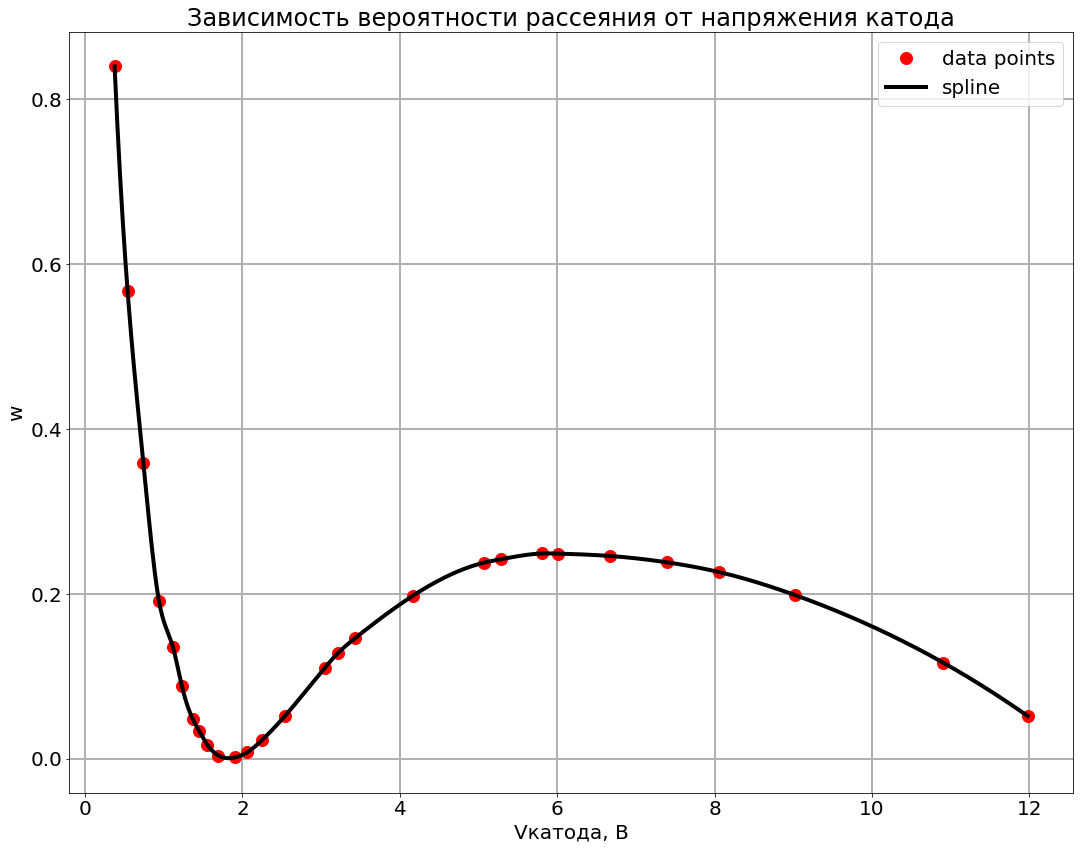

In [11]:
C = 5
I0 = 1.41
w = [-1/C*np.log(Ia1_i/I0) for Ia1_i in Ia1]
ylin3 = interp1d(Vk1, w, kind='cubic')(xlin1)
plot = plt.figure(num='Зависимость вероятности рассеяния от напряжения катода')
plt.plot(Vk1, w, 'ro', label='data points', markersize=12)
plt.plot(xlin1, ylin3, color='black', linewidth=4, label='spline')
plt.ylabel('w')
plt.xlabel('Vкатода, В')
plt.grid(linewidth=2)
plt.legend()
plt.title('Зависимость вероятности рассеяния от напряжения катода')
plt.show()